<a href="https://colab.research.google.com/github/May-o-nnaise/CPSMA-3933-MS/blob/main/SimpsonMasonProject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Assignment

In [1]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

#Linear Regression

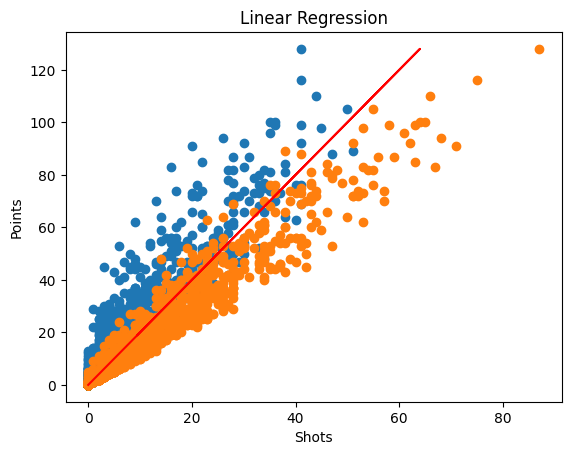

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')
x = np.array(df[['G','A']])
y = np.array(df.PTS)
df['avgGA'] = (df['G'] + df['A']) / 2
x_avg = df[['avgGA']]


lr = LinearRegression()


lr.fit(x,y)
y_pred = lr.predict(x)

#xs = lr.intercept_+(lr.coef_*x)
#ys = (xs)

#plt.plot(xs,ys, color='red')
plt.plot(df['avgGA'], y_pred, color='red', label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('Shots')
plt.ylabel('Points')
plt.scatter(df['G'],df.PTS)
plt.scatter(df['A'],df.PTS)

Because you are taking three different pieces of data, I ended up having to take the average of points and assists in order to fit the linear regression on a 2D graph that way I only have two axis (goals+assists/2, points) rather than three (goals, points, assists). I also left my previous attempt there as a note in the code because I liked it.

#Logistic Regression

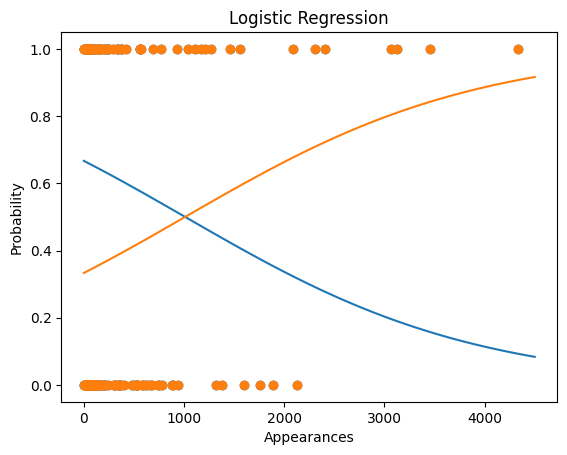

In [3]:
from sklearn.linear_model import LogisticRegression

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')
#df.head()

df['Death1'] = df['Death1'].apply(lambda x: 1.0 if x == 'YES' else 0.0)

plt.scatter(df['Appearances'],df['Death1'])

x = np.array(df[['Appearances']])
y = np.array(df['Death1'])

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x,y)

xs = np.linspace(0,4500,100)
xs = xs.reshape(100,1)
ys = lr.predict_proba(xs)

plt.ylabel('Probability')
plt.xlabel('Appearances')
plt.title('Logistic Regression')
plt.plot(xs,ys)
plt.scatter(x,y)

Similarly to you, I also found the Appearances a variable that was interesting. It was more interesting than the year it came out or the years since joining and I didn't think it was possible to do two things that are categorical for this graph.

In [4]:
spiderman = df[df['Name/Alias'] == 'Peter Benjamin Parker']
peter_parker_appearances = spiderman[['Appearances']].values
probability_of_death = lr.predict_proba(peter_parker_appearances)[:, 1]

print(f"The probability of Peter Parker having Death1 is: {probability_of_death[0]:0.2f}%")

The probability of Peter Parker having Death1 is: 0.91%


My favorite all time Marvel character is Spiderman so he was my go-to for this. Apparently he has a pretty significant chance to die which makes sense because he does actually die in quite a few comic issues. I guess writers can only explore so much stuff when you are the most popular Marvel hero and are in like 4000+ comics.

#Find Your Own Regression

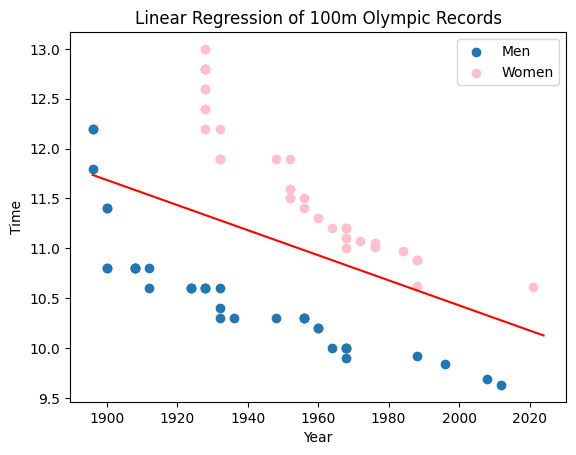

In [5]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')

df['Year'] = pa.to_datetime(df['Date'], format='mixed').dt.year

x = np.array(df['Year'])
y = np.array(df['Time'])

men_only = df[df['Gender'] == 'Men']
women_only = df[df['Gender'] == 'Women']

x = np.array(df['Year'])
y = np.array(df['Time'])

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x.reshape(-1,1),y)#(-1,1) because it makes the years have thier own row for each year: [1896]\n[1900]

xs = np.linspace(1896,2024,100)
xs = xs.reshape(100,1)
ys = lr.predict(xs)

plt.plot(xs,ys, color='red')
plt.title('Linear Regression of 100m Olympic Records')
plt.xlabel('Year')
plt.ylabel('Time')
plt.scatter(men_only['Year'],men_only['Time'], label = 'Men')
plt.scatter(women_only['Year'],women_only['Time'], color='pink',label = 'Women')
plt.legend()

This regression shows how short the time has gotten over the years and it also shows how it seems like 1928 was a pretty bad year for the times, especially for them women. Pretty interesting to see how the times get shorter and shorter every 4 years but its somewhat expected as people figure out what works and what doesn't.